<a href="https://colab.research.google.com/github/NavdeepTU/Deep-Learning/blob/main/03.%20Load%20and%20preprocess%20data/03.%20Load%20CSV%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# setup
import pandas as pd
import numpy as np

# make numpy values easier to read
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

In [2]:
# for any small csv dataset the simplest way to train a tensorflow model
# on it is to load it into memory as a pandas Dataframe or a numpy array

abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
             "Viscera weight", "Shell weight", "Age"]
)

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [3]:
# seperate the features and labels for training

abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [4]:
# pack the features into a single numpy array
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [5]:
# make a regression model to predict the age
abalone_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

abalone_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                      optimizer=tf.keras.optimizers.Adam())

In [6]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 3ms/step - loss: 62.3655
Epoch 2/10
104/104 [==============================] - 0s 2ms/step - loss: 12.2089
Epoch 3/10
104/104 [==============================] - 0s 2ms/step - loss: 9.0278
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 8.4387
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 7.9278
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 7.4998
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 7.1427
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 6.9052
Epoch 9/10
104/104 [==============================] - 0s 2ms/step - loss: 6.7287
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 6.5992


In [7]:
# we have just seen the most basic way to train a model using CSV data.
# next, we will learn how to apply preprocessing to normalize numeric columns.

In [8]:
# basic preprocessing
normalize = tf.keras.layers.Normalization()

In [9]:
normalize.adapt(abalone_features)

In [10]:
norm_abalone_model = tf.keras.Sequential([
    normalize,
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 2ms/step - loss: 93.7403
Epoch 2/10
104/104 [==============================] - 0s 2ms/step - loss: 57.1583
Epoch 3/10
104/104 [==============================] - 0s 2ms/step - loss: 19.4488
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 6.2320
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 5.0046
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9527
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9090
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9118
Epoch 9/10
104/104 [==============================] - 0s 2ms/step - loss: 4.8878
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9155


In [11]:
# mixed data types

titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [12]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [13]:
# now lets convert the categorical features to numeric variables

In [14]:
# In this example, you'll build a model that implements the preprocessing logic using Keras functional API.
# You could also do it by subclassing.

# The functional API operates on "symbolic" tensors. Normal "eager" tensors have a value.
# In contrast these "symbolic" tensors do not. Instead they keep track of which operations are run on them,
# and build a representation of the calculation, that you can run later. Here's a quick example:

In [15]:
# create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# perform a calculation using the input
result = 2*input + 1

# the result doesn't have a value
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.math.add')>

In [16]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [17]:
print(calc(1).numpy())
print(calc(2).numpy())

3.0
5.0


In [18]:
# To build the preprocessing model, start by building a set of symbolic
# tf.keras.Input objects, matching the names and data-types of the CSV columns.

inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [21]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = tf.keras.layers.Concatenate()(list(numeric_inputs.values()))
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>

In [22]:
preprocessed_inputs = [all_numeric_inputs]

In [24]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = tf.keras.layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = tf.keras.layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

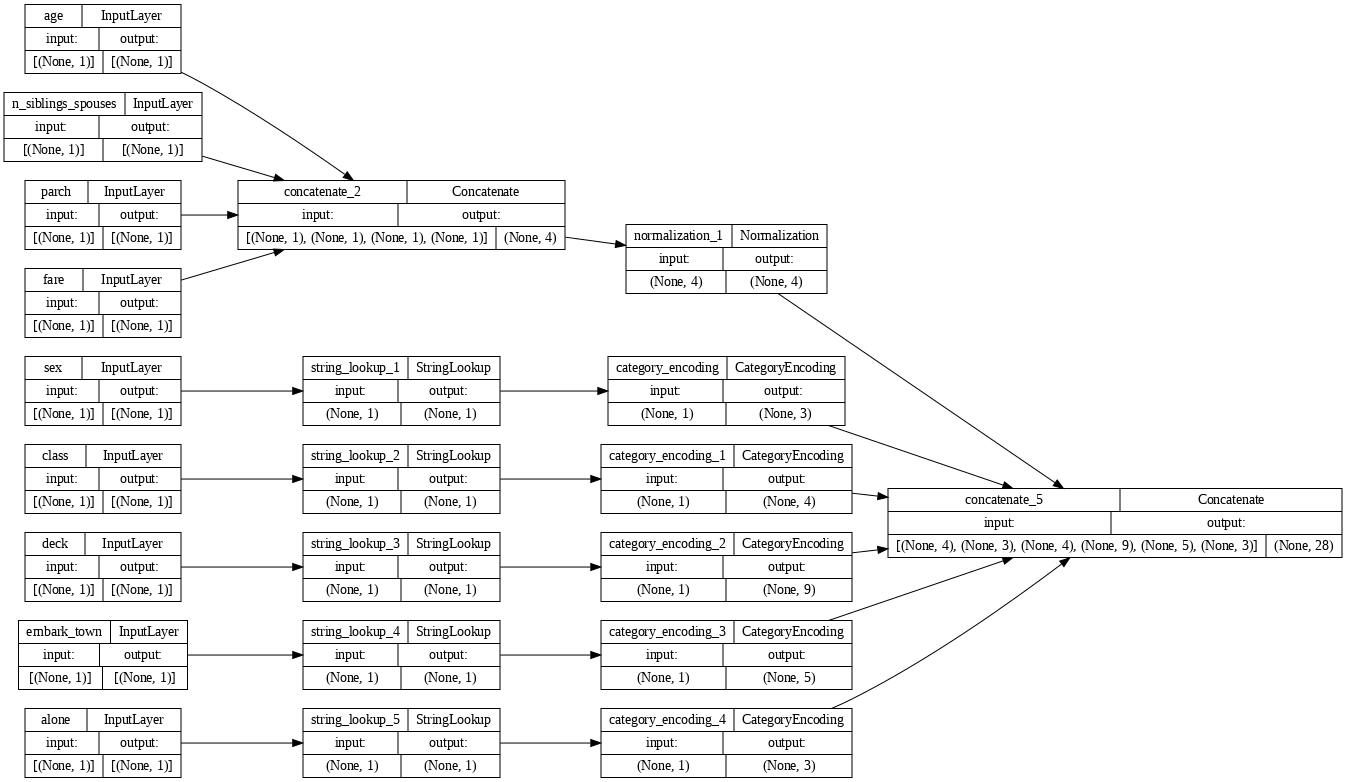

In [27]:
preprocessed_inputs_cat = tf.keras.layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing, rankdir="LR", dpi=72, show_shapes=True)